In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
data.drop(['New_Price','Mileage','Engine','Power','Seats'],axis=1,inplace=True)

In [7]:
data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

In [8]:
data.describe()

,Year,Kilometers_Driven,Price
count,6019.000000,6.019000e+03,6019.000000
mean,2013.358199,5.873838e+04,9.479468
std,3.269742,9.126884e+04,11.187917
min,1998.000000,1.710000e+02,0.440000
25%,2011.000000,3.400000e+04,3.500000
50%,2014.000000,5.300000e+04,5.640000
75%,2016.000000,7.300000e+04,9.950000
max,2019.000000,6.500000e+06,160.000000


In [9]:
data.shape

(6019, 8)

In [10]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Price                0
dtype: int64

In [11]:
df=data.dropna()

In [12]:
df.shape

(6019, 8)

# EDA

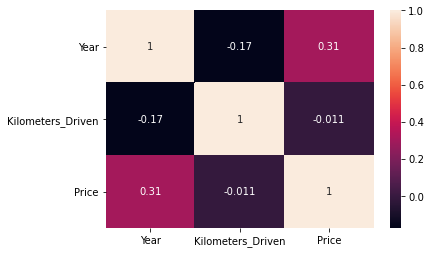

In [13]:
##correlation
sns.heatmap(df.corr(),annot=True)

In [14]:
##price and year are highly correlated
df.Location.value_counts()
##Mumbai has more data

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

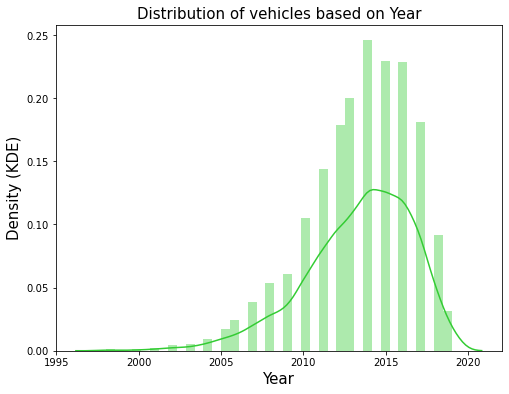

In [15]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["Year"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Year', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.show()
##We see that More data is present between 2010-2018

In [16]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                             49
Maruti Swift VDI                                   45
Maruti Swift Dzire VDI                             34
Honda City 1.5 S MT                                34
Maruti Swift VDI BSIV                              31
                                                   ..
Volkswagen Jetta 2012-2014 2.0L TDI Highline AT     1
Honda City 1.5 EXI S                                1
Nissan Sunny XV CVT                                 1
Ford Figo Aspire 1.5 TDCi Titanium Plus             1
Maruti Baleno Delta CVT                             1
Name: Name, Length: 1876, dtype: int64

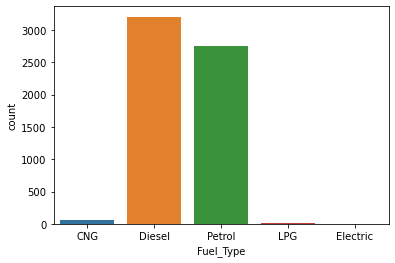

In [17]:
sns.countplot(df['Fuel_Type'],data=df)
##Mostof cars are diesel

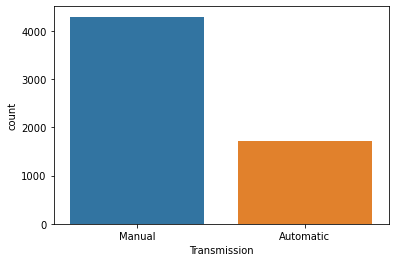

In [18]:
sns.countplot(df['Transmission'],data=df)
##There are more Manual Transmission

In [19]:
df.Kilometers_Driven.value_counts(ascending=False)

60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [20]:
df['Kilometers_Driven'].describe()

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

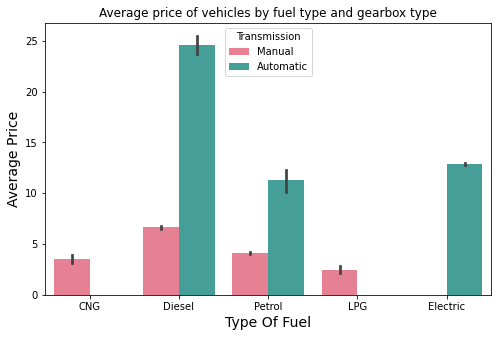

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Fuel_Type", y="Price",hue="Transmission", palette="husl",data=df)
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()
##In diesel and petrol we have more Automatic transmission
##CNG and LPG don't have Automatic GearBox

In [22]:
#df['Engine']=df['Engine'].str.replace('CC','').astype(float)
#df['Power'] = df['Power'].str.replace('null ','0.0')
#df['Power'] = df['Power'].str.replace('bhp','').astype(float)

In [23]:
#df['Mileage']=df['Mileage'].str.replace('km/kg','')

In [24]:
#df['Mileage']=df['Mileage'].str.replace('kmpl','').astype(float)

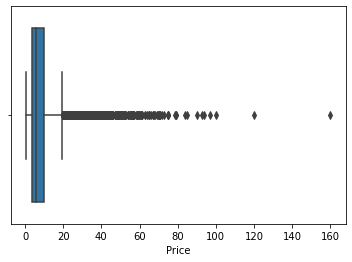

In [25]:
sns.boxplot(df['Price'])

In [26]:
#sns.boxplot(df['Engine'])

In [27]:
#df1=df[df['Power']!=0]

# Feature Engineering

In [28]:
df1=df.copy()

In [29]:
def name(x):
    return x.split(' ')[:1][0]

In [30]:
df1['Brand'] = df1['Name'].apply(name)

In [31]:
df1.drop(['Name'],axis=1,inplace=True)

In [32]:
city_count=df1['Location'].value_counts()
city_cars=city_count[city_count>230]

In [33]:
def replace_city(x):
    if x in city_cars:
        return x
    else:
        return 'Others'

In [34]:
df1['Location']=df1['Location'].apply(replace_city)

In [35]:
cars_count=df1['Brand'].value_counts()
ncars=cars_count[cars_count>=230]

In [36]:
def replace_car(x):
    if x in ncars:
        return x
    else:
        return 'Others'

In [37]:
df1['Brand']=df1['Brand'].apply(replace_car)

In [38]:
df1

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,17.74,Audi
...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,2.65,Maruti


In [39]:
df1.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Price                float64
Brand                 object
dtype: object

In [40]:
df2=df1.copy()
df2['Owner_Type']=df2['Owner_Type'].str.replace('Fourth & Above','Other')

In [41]:
df2['Price']=round(df2['Price']*100000)

# Handling Outlier

In [42]:
max_threshold=df2['Price'].quantile(0.99)
max_threshold

5600000.0

In [43]:
min_threshold=df2['Price'].quantile(0.03)
min_threshold

139540.0

In [66]:
df3=df2[(df2['Price']<max_threshold) & (df2['Price']>min_threshold)]
df3.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Others'], dtype=object)

In [45]:
##Converting categorical to Numerical
df4=pd.get_dummies(df3,columns=['Location','Transmission','Fuel_Type','Owner_Type','Brand'])

In [46]:
X=df4.drop(['Price'],axis=1)
y=df4.Price

# Model Building

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [48]:
x_train.shape,x_test.shape

((4330, 35), (1444, 35))

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.9974280138041781
0.48889545296588854


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9594803010831082
0.7315201199900048


In [53]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
print(xg.score(x_train,y_train))
print(xg.score(x_test,y_test))

0.9464156419914828
0.7250361349344723


In [55]:
import pickle
with open('used_car_price_model.pickle','wb') as f:
    pickle.dump(rf,f)

In [56]:
with open('used_car_price_model.pickle','rb') as file:
    mp = pickle.load(file)

In [57]:
user_input = {'Year':2017, 'Kilometers_Driven':25000, 
               'Brand':"Maruti",'Owner_Type':"First",
            'Fuel_Type':"Diesel",'Transmission':"Manual",'Location':"Bangalore"}

In [67]:
x_test.columns

Index(['Year', 'Kilometers_Driven', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Others', 'Location_Pune',
       'Transmission_Automatic', 'Transmission_Manual', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_First', 'Owner_Type_Other',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Others', 'Brand_Toyota',
       'Brand_Volkswagen'],
      dtype='object')

In [59]:
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(35)
    # set the numerical input as they are
    enc_input[0] = data['Year']
    enc_input[1] = data['Kilometers_Driven']
      
    
    

   
    ##################### manufacturer #########################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Brand_'+data['Brand']
    # search for the index in columns name list 
    manufacturer_column_index = X.columns.tolist().index(redefinded_user_input)

    # fullfill the found index with 1
    enc_input[manufacturer_column_index] = 1
    ##################### Vehicule type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Location_'+data['Location']
    # search for the index in columns name list 
    carType_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[carType_column_index] = 1
    
    ##################### Fuel type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Fuel_Type_'+data['Fuel_Type']
    # search for the index in columns name list 
    fuel_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[fuel_column_index] = 1
    
    ##################### gear box type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Transmission_'+data['Transmission']
    # search for the index in columns name list 
    gear_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[gear_column_index] = 1

    ##################### ac  type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Owner_Type_'+data['Owner_Type']
    # search for the index in columns name list 
    ac_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[ac_column_index] = 1

    return enc_input

In [60]:
a = input_to_one_hot(user_input)

In [61]:
price_pred = rf.predict([a])

In [62]:
price_pred[0]

770160.0

In [63]:
def predict_price(year,km_driven,location,transmission,fuel,owner_type,Brand):
    x=[]
    x=np.zeros(35)
    x[0]=year
    x[1]=km_driven
    location_index=np.where(X.columns==location)[0][0]
    transmission_index=np.where(X.columns==transmission)[0][0]
    fuel_index=np.where(X.columns==fuel)[0][0]
    owner_index=np.where(X.columns==owner_type)[0][0]
    brand_index=np.where(X.columns==Brand)[0][0]
    if location_index>=0:
        x[location_index]=1
    if transmission_index>=0:
        x[transmission_index]=1
    if fuel_index>=0:
        x[fuel_index]=1
    if owner_index>=0:
        x[owner_index]=1
    if brand_index>=0:
        x[brand_index]=1
    return rf.predict([x])[0]

In [64]:
round(predict_price(2017,25000,"Location_Mumbai","Transmission_Manual","Fuel_Type_Diesel","Owner_Type_First","Brand_Mahindra"))

1030208.0

In [65]:
import json
columns={
    "columns":[col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))